<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tom-Petty-Song-Lyric-Generation" data-toc-modified-id="Tom-Petty-Song-Lyric-Generation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tom Petty Song Lyric Generation</a></span></li><li><span><a href="#Tom-Petty" data-toc-modified-id="Tom-Petty-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tom Petty</a></span><ul class="toc-item"><li><span><a href="#Data-Set" data-toc-modified-id="Data-Set-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data Set</a></span></li></ul></li><li><span><a href="#Model-1" data-toc-modified-id="Model-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model 1</a></span><ul class="toc-item"><li><span><a href="#Fit" data-toc-modified-id="Fit-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fit</a></span></li><li><span><a href="#Reverse-Character-Mapping:-int_to_char" data-toc-modified-id="Reverse-Character-Mapping:-int_to_char-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reverse Character Mapping: int_to_char</a></span></li><li><span><a href="#Model-1-Seed-and-Genera-New-Lyrics" data-toc-modified-id="Model-1-Seed-and-Genera-New-Lyrics-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Model 1 Seed and Genera New Lyrics</a></span></li></ul></li><li><span><a href="#Model-2-Longer-Training-Bigger-Batch" data-toc-modified-id="Model-2-Longer-Training-Bigger-Batch-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model 2 Longer Training Bigger Batch</a></span><ul class="toc-item"><li><span><a href="#Set-up-Checkpoint-to-Save-Model-Weights" data-toc-modified-id="Set-up-Checkpoint-to-Save-Model-Weights-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Set up Checkpoint to Save Model Weights</a></span><ul class="toc-item"><li><span><a href="#Reloading-the-saved-model" data-toc-modified-id="Reloading-the-saved-model-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Reloading the saved model</a></span></li></ul></li><li><span><a href="#Model-2-Seed-and-Generate-New-Lyrics&#10;" data-toc-modified-id="Model-2-Seed-and-Generate-New-Lyrics
-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model 2 Seed and Generate New Lyrics
</a></span></li></ul></li><li><span><a href="#Model-3---Different-Model-non-Stateful" data-toc-modified-id="Model-3---Different-Model-non-Stateful-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model 3 - Different Model non-Stateful</a></span><ul class="toc-item"><li><span><a href="#Fit-Model-3" data-toc-modified-id="Fit-Model-3-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Fit Model 3</a></span></li><li><span><a href="#Reload-the-saved-model" data-toc-modified-id="Reload-the-saved-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Reload the saved model</a></span><ul class="toc-item"><li><span><a href="#Other-Model-Experiments" data-toc-modified-id="Other-Model-Experiments-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Other Model Experiments</a></span></li></ul></li><li><span><a href="#Model-3-Seed-and-Generate-New-Lyrics" data-toc-modified-id="Model-3-Seed-and-Generate-New-Lyrics-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Model 3 Seed and Generate New Lyrics</a></span></li></ul></li></ul></div>

In [1]:
import gpu_picker

In [2]:
gpu_picker.gpu_memory_map()


{0: 113, 1: 11962, 2: 0, 3: 0}

In [3]:
gpu_picker.list_available_gpus()


[0, 1, 2, 3]

In [4]:
gpu_picker.pick_gpu_lowest_memory()


2

In [5]:
gpu_picker.setup_one_gpu()

Picking GPU 2


<h1>Tom Petty Song Lyric Generation</h1>


"We are going to learn the dependencies between characters and the conditional probabilities of characters in sequences so that we can in turn generate wholly new and original sequences of characters. These experiments are not limited to text, you can also experiment with other ASCII data, such as computer source code, marked up documents in LaTeX, HTML or Markdown and more." - Inspiration from the terrific Dr. Jason Brownlee tutorial: https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/"We 

In [6]:
import keras

/home/cordun/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/cordun/anaconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [7]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

# Tom Petty
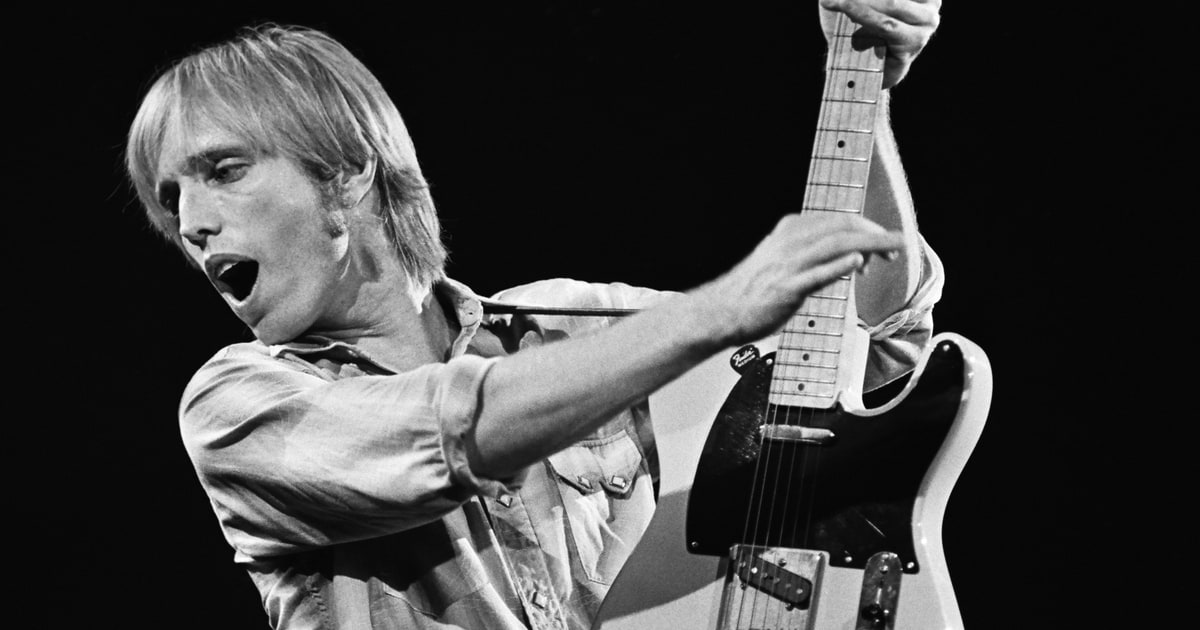

<h2>Data Set</h2>
From the website "Lyrics A to Z", I scraped lyrics for Tom Petty from the Tom Petty and the Heartbreakers Album "Full Moon Fever" in 1989 to his last album "Hypnotic Eye"  in 2014. This consisted of approximately 94,000 characters and 123 songs.

In [8]:
#load the ASCII text for the book into memory and 
#convert all of the characters to lowercase to reduce the vocabulary that the network must learn
# load ascii text and covert to lowercase
filename = "tompetty.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

<b>Character mapping of each character in the dataset to an integer.</b>

In [9]:
#creating a set of all of the distinct characters in the book, 
#then creating a map of each character to a unique integer.
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [10]:
char_to_int

{'\n': 0,
 ' ': 1,
 '!': 2,
 '"': 3,
 '&': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 ',': 8,
 '-': 9,
 '.': 10,
 '0': 11,
 '1': 12,
 '2': 13,
 '3': 14,
 '4': 15,
 '6': 16,
 '7': 17,
 '9': 18,
 ':': 19,
 ';': 20,
 '?': 21,
 '[': 22,
 ']': 23,
 'a': 24,
 'b': 25,
 'c': 26,
 'd': 27,
 'e': 28,
 'f': 29,
 'g': 30,
 'h': 31,
 'i': 32,
 'j': 33,
 'k': 34,
 'l': 35,
 'm': 36,
 'n': 37,
 'o': 38,
 'p': 39,
 'q': 40,
 'r': 41,
 's': 42,
 't': 43,
 'u': 44,
 'v': 45,
 'w': 46,
 'x': 47,
 'y': 48,
 'z': 49,
 '‘': 50,
 '’': 51,
 '…': 52}

<b>There are 53 unique characters.</b>

In [11]:
#summarize the dataset
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

Total Characters:  94791
Total Vocab:  53


<b>We will feed in a 50-sequence of characters. This will be the basis for the "seed" lyric that needs to be fed to the model for it to then generate a sequence of lyrics.</b>

In [12]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 50 #shorter sequences for lyrics
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
	seq_in = raw_text[i:i + seq_length]
	seq_out = raw_text[i + seq_length]
	dataX.append([char_to_int[char] for char in seq_in])
	dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  94741


<b>X is reshaped into a 3D vector of (samples, timesteps, features). Y is turned into a one-hot-encoded vector for each of the 53 characters. This is essentially a 53-class multiclassification supervised problem.</b>

In [13]:
# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [14]:
print(X.shape)
print(y.shape)

(94741, 50, 1)
(94741, 53)


<h1>Model 1</h1>

In [15]:
batch_size = 1

model = Sequential()
model.add(LSTM(16, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
from keras.models import load_model, Model
# define the checkpoint
filepath="tom.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [17]:
X.shape[1]

50

In [18]:
X.shape[2]

1

<h2>Fit</h2>
An important difference in training the stateful LSTM is that we train it manually one epoch at a time and reset the state after each epoch. We can do this in a for loop. Again, <font color=#ff0000><b>we do not shuffle the input</b>, preserving the sequence in which the input training data was created.

In [ ]:
for i in range(10):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False,callbacks=callbacks_list)
	model.reset_states()

In [23]:
#RELOAD
# load the network weights if you don't just keep running the model
filename = "tom.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0))

In [ ]:
# summarize performance of the model
scores = model.evaluate(X, y, batch_size=batch_size, verbose=0)
model.reset_states()
print("Model Accuracy: %.2f%%" % (scores[1]*100))

<h2>Reverse Character Mapping: int_to_char</h2>

In [24]:
#reverse mapping
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [25]:
int_to_char

{0: '\n',
 1: ' ',
 2: '!',
 3: '"',
 4: '&',
 5: "'",
 6: '(',
 7: ')',
 8: ',',
 9: '-',
 10: '.',
 11: '0',
 12: '1',
 13: '2',
 14: '3',
 15: '4',
 16: '6',
 17: '7',
 18: '9',
 19: ':',
 20: ';',
 21: '?',
 22: '[',
 23: ']',
 24: 'a',
 25: 'b',
 26: 'c',
 27: 'd',
 28: 'e',
 29: 'f',
 30: 'g',
 31: 'h',
 32: 'i',
 33: 'j',
 34: 'k',
 35: 'l',
 36: 'm',
 37: 'n',
 38: 'o',
 39: 'p',
 40: 'q',
 41: 'r',
 42: 's',
 43: 't',
 44: 'u',
 45: 'v',
 46: 'w',
 47: 'x',
 48: 'y',
 49: 'z',
 50: '‘',
 51: '’',
 52: '…'}

<h2>Model 1 Seed and Genera New Lyrics</h2> - a random seed of 50 characters and output a sequence of 100 characters

In [27]:
#seed and test

import sys
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(100):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")
model.reset_states()

Seed:
" limb that hill again

i've been wrapped up in conf "
 ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe ioe
Done.


<h1>Model 2 Longer Training Bigger Batch</h1> A different batch size of 17.

In [20]:
#a larger batch size
batch_size = 17 #17 is divisible by 94741

model = Sequential()
model.add(LSTM(16, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

<h2>Set up Checkpoint to Save Model Weights</h2> The below creates a file and continues to save weights to it while fitting. This is called a checkpoint.

In [21]:
from keras.models import load_model, Model
# define the checkpoint
filepath="tom_2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [70]:
for i in range(10):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False,callbacks=callbacks_list)
	model.reset_states()

Epoch 1/1
94741/94741 [==============================] - 430s 5ms/step - loss: 2.9760 - acc: 0.1705

Epoch 00001: loss improved from inf to 2.97598, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 422s 4ms/step - loss: 2.8426 - acc: 0.2105

Epoch 00001: loss improved from 2.97598 to 2.84264, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 422s 4ms/step - loss: 2.7791 - acc: 0.2169

Epoch 00001: loss improved from 2.84264 to 2.77908, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 421s 4ms/step - loss: 2.7560 - acc: 0.2194

Epoch 00001: loss improved from 2.77908 to 2.75604, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 421s 4ms/step - loss: 2.7400 - acc: 0.2222

Epoch 00001: loss improved from 2.75604 to 2.74003, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 453s 5ms/step - loss: 2.7232 - acc: 0.2262

Epo

All the epochs below are me running it longer and longer.

In [71]:
for i in range(10):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False,callbacks=callbacks_list)
	model.reset_states()

Epoch 1/1
94741/94741 [==============================] - 497s 5ms/step - loss: 2.6612 - acc: 0.2378

Epoch 00001: loss improved from 2.67068 to 2.66122, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 498s 5ms/step - loss: 2.6526 - acc: 0.2379

Epoch 00001: loss improved from 2.66122 to 2.65261, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 502s 5ms/step - loss: 2.6451 - acc: 0.2378

Epoch 00001: loss improved from 2.65261 to 2.64507, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 470s 5ms/step - loss: 2.6373 - acc: 0.2398

Epoch 00001: loss improved from 2.64507 to 2.63731, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 424s 4ms/step - loss: 2.6309 - acc: 0.2412

Epoch 00001: loss improved from 2.63731 to 2.63090, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 476s 5ms/step - loss: 2.6252 - acc: 0.2422


In [72]:
for i in range(3):
	model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False,callbacks=callbacks_list)
	model.reset_states()

Epoch 1/1
94741/94741 [==============================] - 496s 5ms/step - loss: 2.6018 - acc: 0.2452

Epoch 00001: loss improved from 2.60590 to 2.60177, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 495s 5ms/step - loss: 2.5977 - acc: 0.2462

Epoch 00001: loss improved from 2.60177 to 2.59771, saving model to tom_2.hdf5
Epoch 1/1
94741/94741 [==============================] - 494s 5ms/step - loss: 2.5940 - acc: 0.2470

Epoch 00001: loss improved from 2.59771 to 2.59405, saving model to tom_2.hdf5


The reverse mapping again.

In [27]:
#reverse mapping
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [28]:
len(dataX)

94741

<h3>Reloading the saved model</h3> This is efficient because it has saved all the weights in the network and is running inference without the GPU.

In [30]:
#RELOAD
# load the network weights if you don't just keep running the model
filename = "tom_2.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0))

<h2>Model 2 Seed and Generate New Lyrics</23>

In [32]:
#seed and test

import sys
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(20):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")
model.reset_states()

Seed:
" 
some things go on
part of me you carry
part of me "
n ioe ioe ioe ioe io
Done.


<h1>Model 3 - Different Model non-Stateful</h1>
- Greater batch size of 150 char-sequence
- Not Stateful
- Larger model with more LSTM units

In [22]:
model = Sequential()
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(512))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

Save it as a new weight file.

In [23]:
from keras.models import load_model, Model
# define the checkpoint
filepath="tom_3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

<h2>Fit Model 3</h2>

In [38]:
# fit the model
model.fit(X, y, epochs=10, batch_size=150, callbacks=callbacks_list)

Epoch 1/10
94741/94741 [==============================] - 123s 1ms/step - loss: 2.9042

Epoch 00001: loss improved from inf to 2.90419, saving model to tom_3.hdf5
Epoch 2/10
94741/94741 [==============================] - 121s 1ms/step - loss: 2.6629

Epoch 00002: loss improved from 2.90419 to 2.66285, saving model to tom_3.hdf5
Epoch 3/10
94741/94741 [==============================] - 122s 1ms/step - loss: 2.5129

Epoch 00003: loss improved from 2.66285 to 2.51285, saving model to tom_3.hdf5
Epoch 4/10
94741/94741 [==============================] - 122s 1ms/step - loss: 2.3307

Epoch 00004: loss improved from 2.51285 to 2.33075, saving model to tom_3.hdf5
Epoch 5/10
94741/94741 [==============================] - 121s 1ms/step - loss: 2.1611

Epoch 00005: loss improved from 2.33075 to 2.16107, saving model to tom_3.hdf5
Epoch 6/10
94741/94741 [==============================] - 121s 1ms/step - loss: 1.9997

Epoch 00006: loss improved from 2.16107 to 1.99968, saving model to tom_3.hdf5
Ep

In [ ]:
# fit the model
model.fit(X, y, epochs=30, batch_size=150, callbacks=callbacks_list)

Epoch 1/30
94741/94741 [==============================] - 123s 1ms/step - loss: 1.3298

Epoch 00001: loss improved from 1.44252 to 1.32976, saving model to tom_3.hdf5
Epoch 2/30
94741/94741 [==============================] - 122s 1ms/step - loss: 1.2344

Epoch 00002: loss improved from 1.32976 to 1.23436, saving model to tom_3.hdf5
Epoch 3/30
94741/94741 [==============================] - 123s 1ms/step - loss: 1.1401

Epoch 00003: loss improved from 1.23436 to 1.14006, saving model to tom_3.hdf5
Epoch 4/30
94741/94741 [==============================] - 120s 1ms/step - loss: 1.0579

Epoch 00004: loss improved from 1.14006 to 1.05793, saving model to tom_3.hdf5
Epoch 5/30
94741/94741 [==============================] - 121s 1ms/step - loss: 0.9838

Epoch 00005: loss improved from 1.05793 to 0.98378, saving model to tom_3.hdf5
Epoch 6/30
94741/94741 [==============================] - 122s 1ms/step - loss: 0.9177

Epoch 00006: loss improved from 0.98378 to 0.91774, saving model to tom_3.hdf

<b>** You'll notice the model has not improved so far beyond 0.47492, and then it started spiking up.

<h2>Reload the saved model</h2>

In [24]:
#RELOAD
# load the network weights if you don't just keep running the model
filename = "tom_3.hdf5"
model.load_weights(filename)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0))

In [25]:
from keras.models import load_model, Model
# define the checkpoint
filepath="tom_3.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

<h3>Other Model Experiments</h3> Here are some techniques I'm trying to explore to iteratively reduce the learning rate (slowing down the rate of gradient descent, or back propogation, so that it doesn't over shooot the global minimum).

In [ ]:
#because the log loss is starting to creep up
#this reduces the learning rate
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

# fit the model
model.fit(X, y, epochs=1, batch_size=15, callbacks=[reduce_lr])

<h2>Model 3 Seed and Generate New Lyrics</h2> of 50 random characters - Output 100 chracters</h1>

In [35]:
#seed and test

import sys
# pick a random seed
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(115):
	x = numpy.reshape(pattern, (1, len(pattern), 1))
	x = x / float(n_vocab)
	prediction = model.predict(x, verbose=0)
	index = numpy.argmax(prediction)
	result = int_to_char[index]
	seq_in = [int_to_char[value] for value in pattern]
	sys.stdout.write(result)
	pattern.append(index)
	pattern = pattern[1:len(pattern)]
print ("\nDone.")

Seed:
" wn

all around your island
there's a barricade
tha "
t keeps out the danger
that holds in the pain

sometimes you're so iapp you say you can't semember
down a thadoe
on
Done.
